In [45]:
# @title 1. Extraccion de Archivo Tratado

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/TelecomX_Dato_Limpio.csv')
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [46]:
df.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total', 'Cuentas_Diarias'],
      dtype='object')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   objec

In [48]:
# @title 2. Eliminacion de Colummnas Irrelevantes

df = df.drop('customerID', axis=1)
df.head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [66]:
# @title 3. Encoding

categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('Churn')

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

display(df_encoded.head())

,Churn,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,...,internet.StreamingTV_No internet service,internet.StreamingTV_Yes,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,No,0,9,65.6,593.30,2.186667,False,True,True,True,...,False,True,False,False,True,False,True,False,False,True
1,No,0,9,59.9,542.40,1.996667,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,Yes,0,4,73.9,280.85,2.463333,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
3,Yes,1,13,98.0,1237.85,3.266667,True,True,False,True,...,False,True,False,True,False,False,True,False,True,False
4,Yes,1,3,83.9,267.40,2.796667,False,True,False,True,...,False,True,False,False,False,False,True,False,False,True


In [50]:
# @title 4. Verificación de la Proporción de Cancelación (Churn)

# Calcular la proporción de clientes con Churn
churn_counts = df['Churn'].value_counts()
churn_proportion = churn_counts / len(df)

# Mostrar la proporción de churn en una tabla
print("Proporción de Churn:")
display(churn_proportion)

Proporción de Churn:


,count
Churn,
No,0.73463
Yes,0.26537


In [51]:
# @title 5. Balanceo de Datos

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Asegurarse de que df_encoded está disponible (viene de la celda de encoding)
# Si no está disponible, ejecutar las celdas anteriores
if 'df_encoded' not in globals():
    print("Error: 'df_encoded' no encontrado. Por favor, ejecuta las celdas anteriores.")
else:
    # Rellenar valores faltantes en 'account.Charges.Total' con la mediana
    # Esto es necesario ya que SMOTE no puede manejar valores NaN
    df_encoded['account.Charges.Total'] = df_encoded['account.Charges.Total'].fillna(df_encoded['account.Charges.Total'].median())

    # Verificar si quedan valores faltantes (debería ser 0)
    print("Valores faltantes después de imputación:", df_encoded.isnull().sum().sum())


    # Separar las características (X) y la variable objetivo (y)
    # Convertir la variable objetivo 'Churn' a numérico (0 para 'No', 1 para 'Yes')
    X = df_encoded.drop('Churn', axis=1)
    y = df_encoded['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)


    # Dividir los datos en conjuntos de entrenamiento y prueba
    # Usamos stratify=y para mantener la proporción de clases en ambos conjuntos antes de aplicar SMOTE
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Aplicar SMOTE solo al conjunto de entrenamiento
    # SMOTE genera ejemplos sintéticos de la clase minoritaria para balancear el conjunto de entrenamiento
    smote = SMOTE(random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

    # Mostrar las nuevas proporciones de clases en el conjunto de entrenamiento balanceado
    print("\nProporción de clases después de SMOTE:")
    print(y_train_res.value_counts() / len(y_train_res))

    # Mostrar los tamaños de los conjuntos resultantes después de SMOTE
    print("\nTamaño del conjunto de entrenamiento después de SMOTE (X_train_res, y_train_res):", X_train_res.shape, y_train_res.shape)
    print("Tamaño del conjunto de prueba (X_test, y_test):", X_test.shape, y_test.shape)

Valores faltantes después de imputación: 0

Proporción de clases después de SMOTE:
Churn
0    0.5
1    0.5
Name: count, dtype: float64

Tamaño del conjunto de entrenamiento después de SMOTE (X_train_res, y_train_res): (8278, 31) (8278,)
Tamaño del conjunto de prueba (X_test, y_test): (1409, 31) (1409,)


In [52]:
# @title 6. Normalizacion y Estandarizacion de Datos

from sklearn.preprocessing import StandardScaler

# Inicializar el StandardScaler
scaler = StandardScaler()

# Estandarizar las características en los conjuntos de entrenamiento y prueba
# Ajustamos el scaler solo con los datos de entrenamiento balanceados
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

print("Tamaño del conjunto de entrenamiento estandarizado:", X_train_scaled.shape)
print("Tamaño del conjunto de prueba estandarizado:", X_test_scaled.shape)

Tamaño del conjunto de entrenamiento estandarizado: (8278, 31)
Tamaño del conjunto de prueba estandarizado: (1409, 31)


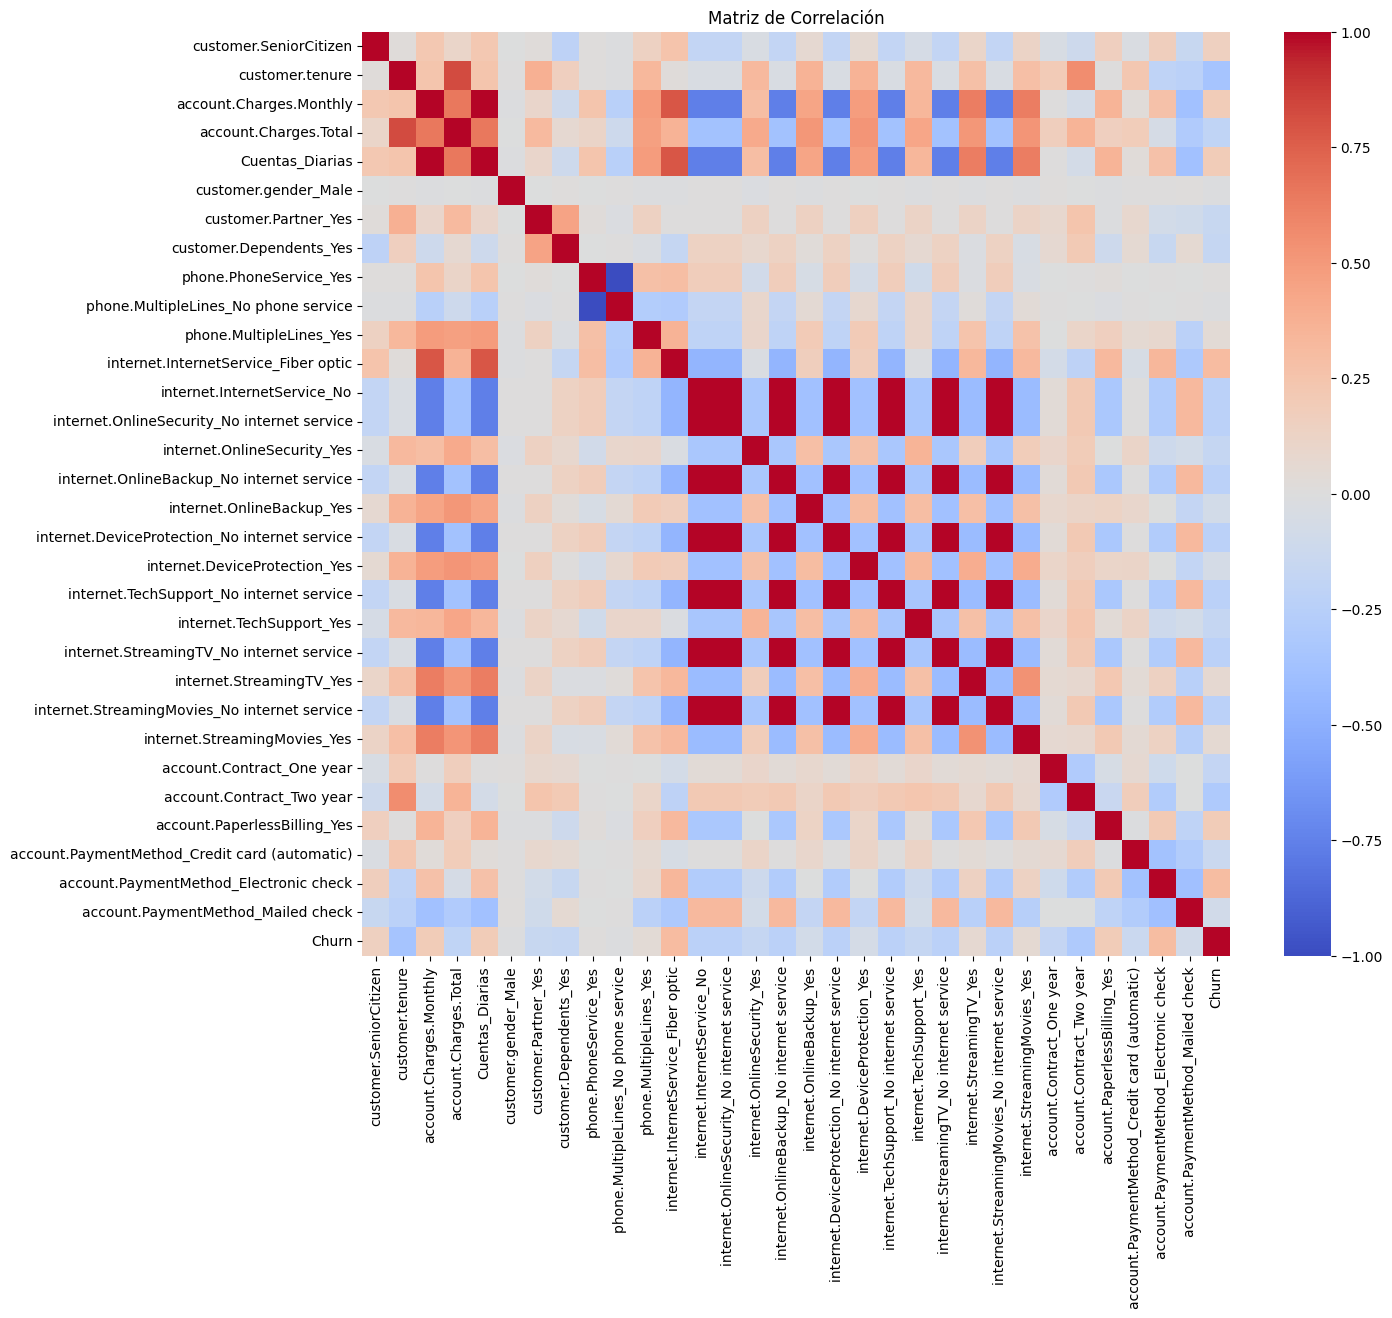


Correlación con la variable Churn:


,Churn
Churn,1.000000
internet.InternetService_Fiber optic,0.308020
account.PaymentMethod_Electronic check,0.301919
account.Charges.Monthly,0.193356
Cuentas_Diarias,0.193356
account.PaperlessBilling_Yes,0.191825
customer.SeniorCitizen,0.150889
internet.StreamingTV_Yes,0.063228
internet.StreamingMovies_Yes,0.061382
phone.MultipleLines_Yes,0.040102


In [53]:
# @title 7. Analisis de Correlacion

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Combinar las características (X) y la variable objetivo (y) para el análisis de correlación
# Asegurarse de que X y y están disponibles (vienen de la celda de balanceo)
if 'X' not in globals() or 'y' not in globals():
    print("Error: 'X' o 'y' no encontrados. Por favor, ejecuta las celdas anteriores.")
else:
    df_corr = pd.concat([X, y], axis=1)

    # Calcular la matriz de correlación
    correlation_matrix = df_corr.corr()

    # Visualizar la matriz de correlación usando un mapa de calor
    plt.figure(figsize=(14, 12)) # Ajustar tamaño para mejor visualización
    sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
    plt.title('Matriz de Correlación')
    plt.show()

    # Opcional: Mostrar las correlaciones con la variable objetivo 'Churn' en formato de tabla
    print("\nCorrelación con la variable Churn:")
    display(correlation_matrix['Churn'].sort_values(ascending=False))

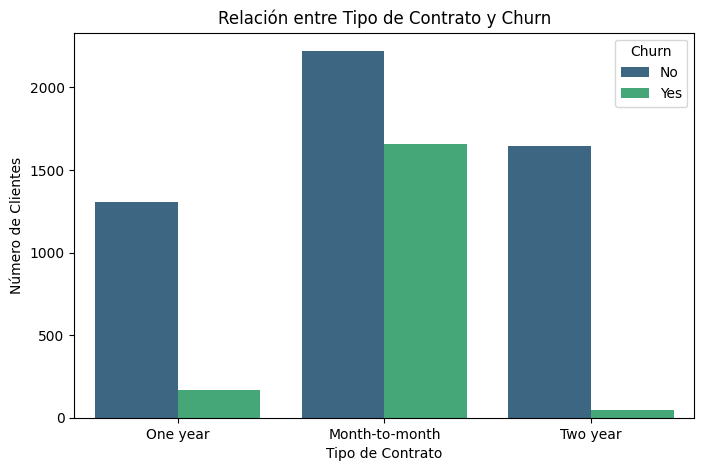

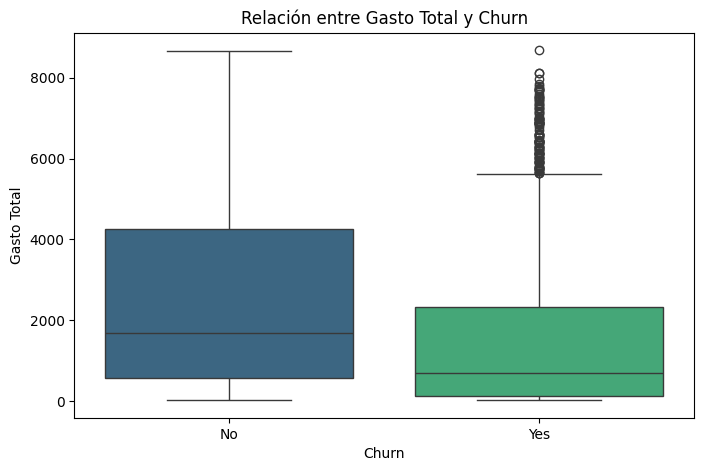

In [54]:
# @title 8. Analisis Dirigido

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asegurarse de que df está disponible (viene de la celda de carga de datos)
if 'df' not in globals():
    print("Error: 'df' no encontrado. Por favor, ejecuta la celda de carga de datos.")
else:
    # Analizar la relación entre el tipo de contrato y Churn
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x='account.Contract', hue='Churn', palette='viridis')
    plt.title('Relación entre Tipo de Contrato y Churn')
    plt.xlabel('Tipo de Contrato')
    plt.ylabel('Número de Clientes')
    plt.show()

    # Analizar la relación entre el gasto total y Churn usando un boxplot
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='Churn', y='account.Charges.Total', palette='viridis', hue='Churn')
    plt.title('Relación entre Gasto Total y Churn')
    plt.xlabel('Churn')
    plt.ylabel('Gasto Total')
    plt.show()

In [55]:
# @title 9. Separacion de Datos

from sklearn.model_selection import train_test_split
import pandas as pd

# Asegurarse de que df_encoded está disponible (viene de la celda de encoding y manejo de faltantes)
if 'df_encoded' not in globals():
    print("Error: 'df_encoded' no encontrado. Por favor, ejecuta las celdas anteriores.")
else:
    # Separar las características (X) y la variable objetivo (y)
    # Convertir la variable objetivo 'Churn' a numérico (0 para 'No', 1 para 'Yes')
    X = df_encoded.drop('Churn', axis=1)
    y = df_encoded['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

    # Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
    # Usamos stratify=y para mantener la proporción de clases en ambos conjuntos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    print("Tamaño del conjunto de entrenamiento (X_train, y_train):", X_train.shape, y_train.shape)
    print("Tamaño del conjunto de prueba (X_test, y_test):", X_test.shape, y_test.shape)

Tamaño del conjunto de entrenamiento (X_train, y_train): (5634, 31) (5634,)
Tamaño del conjunto de prueba (X_test, y_test): (1409, 31) (1409,)


In [72]:
# @title 10. Modelo de Regresion Logistica

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Crear el modelo
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Entrenar usando datos normalizados
log_reg.fit(X_train_scaled, y_train_res) # Corregido: usar y_train_res

# Predicciones
y_pred_log = log_reg.predict(X_test_scaled)

# Evaluación
print("📊 Regresión Logística (normalizada)")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_log))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred_log))

📊 Regresión Logística (normalizada)
Accuracy: 0.7743080198722498
Matriz de confusión:
 [[860 175]
 [143 231]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.86      0.83      0.84      1035
           1       0.57      0.62      0.59       374

    accuracy                           0.77      1409
   macro avg       0.71      0.72      0.72      1409
weighted avg       0.78      0.77      0.78      1409



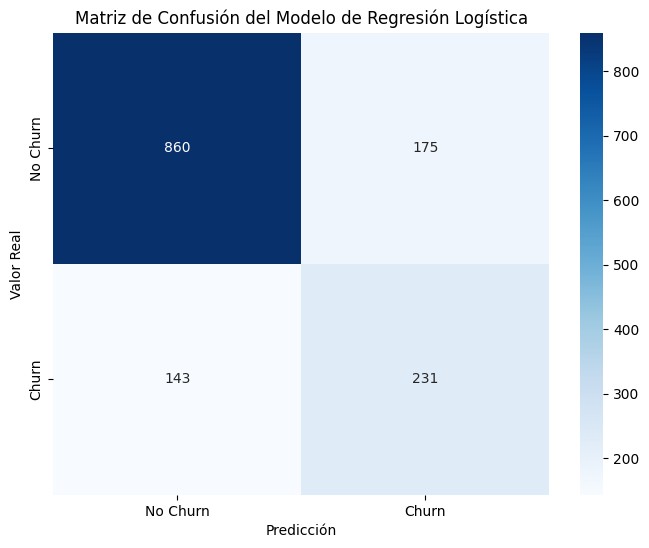

In [73]:
# @title Grafico de Regresion Logistica
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Asegurarse de que y_test y y_pred_log están disponibles (vienen de la celda de evaluación de Regresión Logística)
if 'y_test' not in globals() or 'y_pred_log' not in globals():
    print("Error: Las variables y_test o y_pred_log no encontradas. Por favor, ejecuta la celda donde se evalúa el modelo de Regresión Logística (celda lhGx_nAs_vH0).")
else:
    # Calcular la matriz de confusión
    cm_log = confusion_matrix(y_test, y_pred_log)

    # Crear un mapa de calor para visualizar la matriz de confusión
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
    plt.title('Matriz de Confusión del Modelo de Regresión Logística')
    plt.xlabel('Predicción')
    plt.ylabel('Valor Real')
    plt.show()

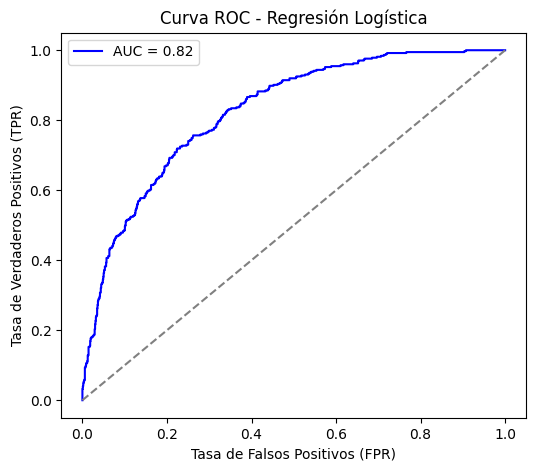

In [81]:
# @title Grafico de Regresion Logistica (Curva ROC y AUC)
from sklearn.metrics import roc_curve, auc

# Obtener probabilidades para la clase positiva
y_proba_log = log_reg.predict_proba(X_test_scaled)[:, 1]

# Calcular curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba_log)
roc_auc = auc(fpr, tpr)

# Graficar
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='blue')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Regresión Logística')
plt.legend()
plt.show()


/tmp/ipython-input-4149652878.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coeficiente', y='Variable', data=coef_df.head(10), palette='coolwarm')


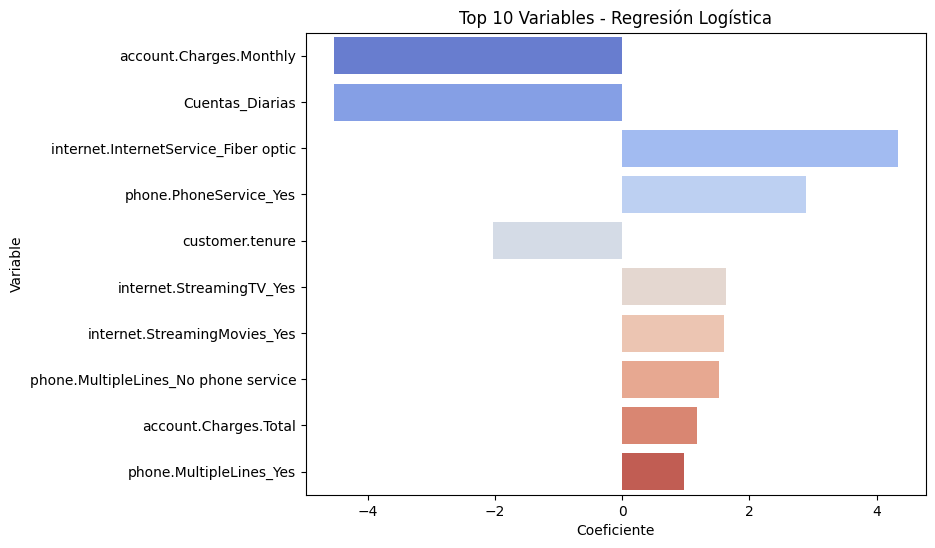

In [82]:
# @title Gráfico de Importancia de Variables (Coeficientes)
import pandas as pd
import numpy as np

# Obtener nombres de variables
feature_names = X.columns

# Extraer coeficientes
coefs = log_reg.coef_[0]

# Crear DataFrame ordenado por importancia absoluta
coef_df = pd.DataFrame({'Variable': feature_names, 'Coeficiente': coefs})
coef_df['Importancia'] = np.abs(coef_df['Coeficiente'])
coef_df = coef_df.sort_values(by='Importancia', ascending=False)

# Graficar
plt.figure(figsize=(8,6))
sns.barplot(x='Coeficiente', y='Variable', data=coef_df.head(10), palette='coolwarm')
plt.title('Top 10 Variables - Regresión Logística')
plt.show()


In [75]:
# @title 11. Modelo KNM
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Crear el modelo con k=5 vecinos
knn = KNeighborsClassifier(n_neighbors=5)

# Entrenar usando datos normalizados
knn.fit(X_train_scaled, y_train_res)

# Predicciones
y_pred_knn = knn.predict(X_test_scaled)

# Evaluación
print("📊 KNN (normalizado)")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_knn))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred_knn))

📊 KNN (normalizado)
Accuracy: 0.7338537970191625
Matriz de confusión:
 [[793 242]
 [133 241]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.86      0.77      0.81      1035
           1       0.50      0.64      0.56       374

    accuracy                           0.73      1409
   macro avg       0.68      0.71      0.69      1409
weighted avg       0.76      0.73      0.74      1409



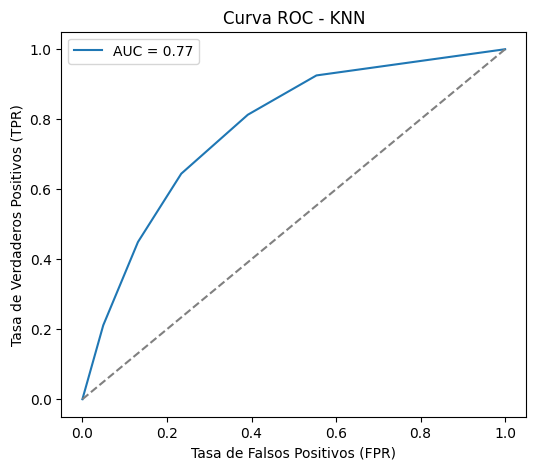

In [77]:
# @title Grafico de Modelo KNM (Curva ROC y AUC)
from sklearn.metrics import roc_curve, auc

# Obtener probabilidades para la clase positiva
y_proba_knn = knn.predict_proba(X_test_scaled)[:, 1]

# Calcular curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba_knn)
roc_auc = auc(fpr, tpr)

# Graficar
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - KNN')
plt.legend()
plt.show()


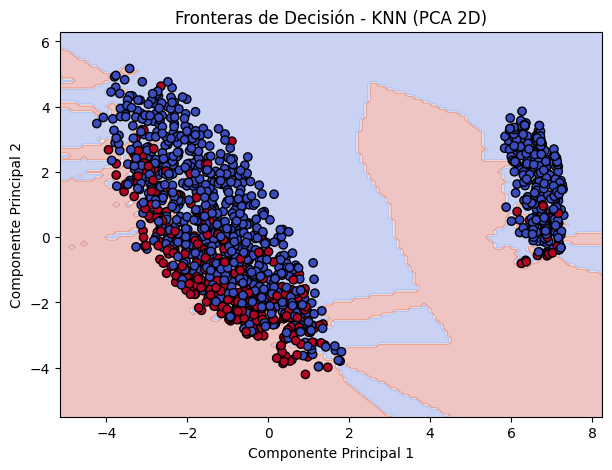

In [80]:
# @title Grafico de Modelo KNM (Visualización de Fronteras de Decisión)
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

# Reducir a 2 dimensiones para graficar
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Reentrenar KNN con los datos reducidos
knn_2d = KNeighborsClassifier(n_neighbors=5)
knn_2d.fit(X_train_pca, y_train_res) # Corregido: usar y_train_res

# Crear malla de puntos para dibujar fronteras
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar
plt.figure(figsize=(7,5))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, edgecolor='k', cmap='coolwarm')
plt.title('Fronteras de Decisión - KNN (PCA 2D)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

In [91]:
# @title 12. Modelo Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Crear el modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar usando datos balanceados
# Asegurarse de que X_train_res y y_train_res están disponibles
if 'X_train_res' not in globals() or 'y_train_res' not in globals():
    print("Error: X_train_res o y_train_res no encontrados. Por favor, ejecuta la celda de Balanceo de Datos.")
else:
    rf.fit(X_train_res, y_train_res)

    # Predicciones en el conjunto de prueba original (no escalado ni balanceado)
    y_pred_rf = rf.predict(X_test)

    # Evaluación
    print("📊 Random Forest (entrenado con datos balanceados)")
    print("Accuracy:", accuracy_score(y_test, y_pred_rf))
    print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_rf))
    print("Reporte de clasificación:\n", classification_report(y_test, y_pred_rf))

📊 Random Forest (entrenado con datos balanceados)
Accuracy: 0.7714691270404542
Matriz de confusión:
 [[873 162]
 [160 214]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.85      0.84      0.84      1035
           1       0.57      0.57      0.57       374

    accuracy                           0.77      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.77      0.77      0.77      1409



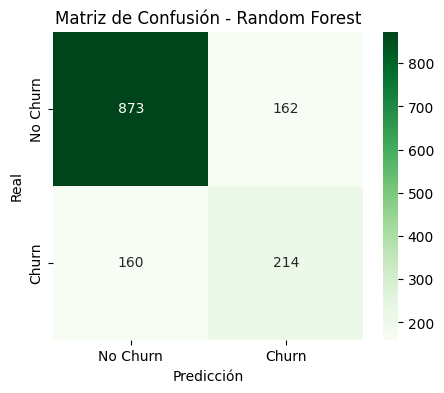

In [92]:
# @title Grafico Matriz de Confusion - Random Forest
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular matriz de confusión
cm = confusion_matrix(y_test, y_pred_rf)

# Graficar
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Random Forest')
plt.show()


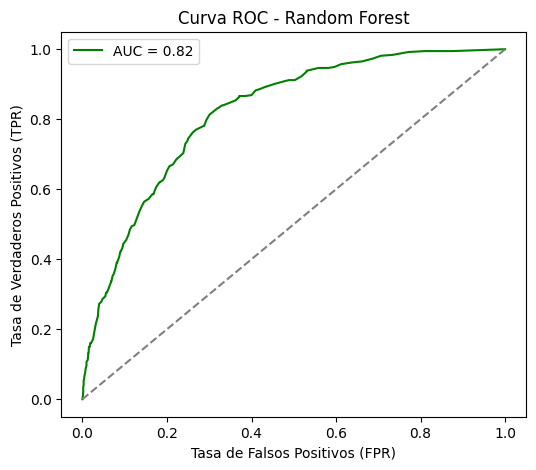

In [93]:
# @title Grafico - Curva ROC y AUC
from sklearn.metrics import roc_curve, auc

# Probabilidades para la clase positiva
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# Calcular curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba_rf)
roc_auc = auc(fpr, tpr)

# Graficar
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='green')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Random Forest')
plt.legend()
plt.show()


/tmp/ipython-input-3507168583.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Variable', data=feature_importance_df.head(10), palette='viridis')


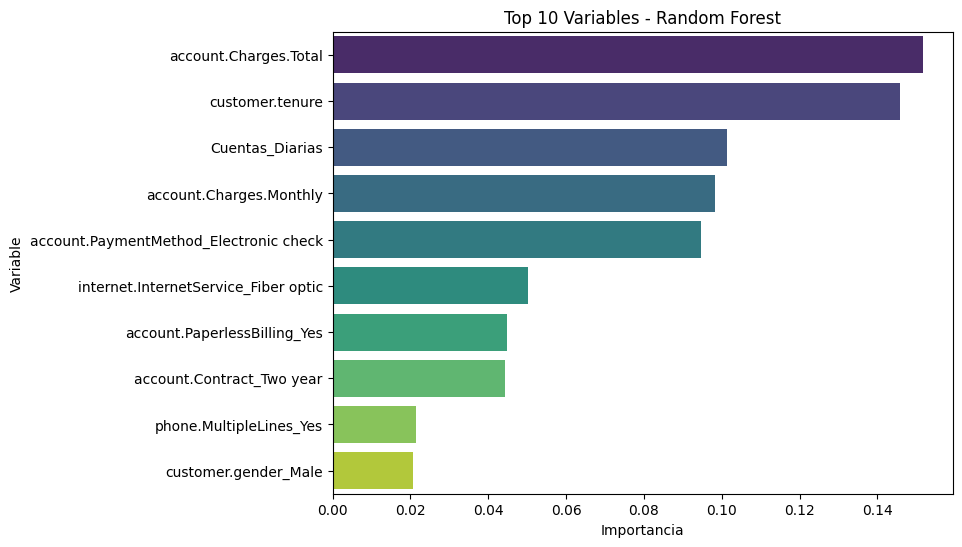

In [94]:
# @title Grafico - Importancia de Variables
import pandas as pd
import numpy as np

# Obtener importancias
importances = rf.feature_importances_

# Crear DataFrame
feature_importance_df = pd.DataFrame({'Variable': X.columns, 'Importancia': importances})

# Ordenar por importancia
feature_importance_df = feature_importance_df.sort_values(by='Importancia', ascending=False)

# Graficar las 10 más importantes
plt.figure(figsize=(8,6))
sns.barplot(x='Importancia', y='Variable', data=feature_importance_df.head(10), palette='viridis')
plt.title('Top 10 Variables - Random Forest')
plt.show()


/tmp/ipython-input-3520320042.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  resultados = pd.concat([resultados, pd.DataFrame([{


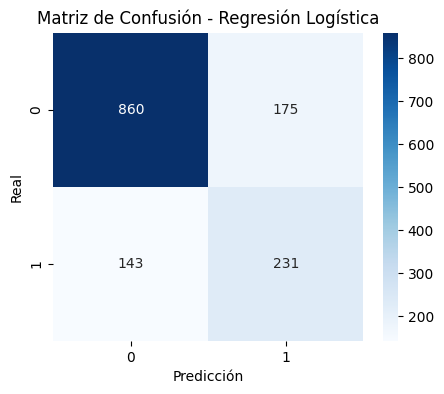


Reporte de Clasificación - Regresión Logística:

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1035
           1       0.57      0.62      0.59       374

    accuracy                           0.77      1409
   macro avg       0.71      0.72      0.72      1409
weighted avg       0.78      0.77      0.78      1409



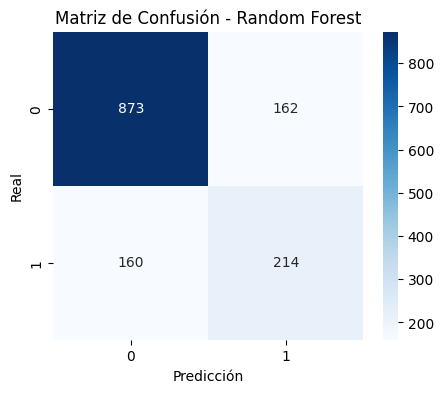


Reporte de Clasificación - Random Forest:

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1035
           1       0.57      0.57      0.57       374

    accuracy                           0.77      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.77      0.77      0.77      1409



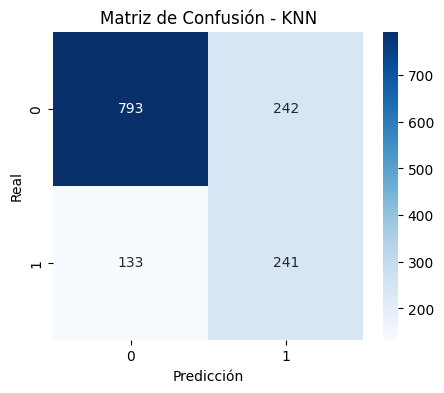


Reporte de Clasificación - KNN:

              precision    recall  f1-score   support

           0       0.86      0.77      0.81      1035
           1       0.50      0.64      0.56       374

    accuracy                           0.73      1409
   macro avg       0.68      0.71      0.69      1409
weighted avg       0.76      0.73      0.74      1409


📊 Comparación de Modelos:

                Modelo  Exactitud  Precisión    Recall  F1-Score
0  Regresión Logística   0.774308   0.780859  0.774308  0.777166
1        Random Forest   0.771469   0.771861  0.771469  0.771663
2                  KNN   0.733854   0.761503  0.733854  0.743382

✅ Mejor modelo según Exactitud: Regresión Logística
✅ Regresión Logística: Consistencia aceptable entre entrenamiento y prueba (Entrenamiento: 0.83, Test: 0.77)
⚠ Random Forest podría tener diferencias significativas entre entrenamiento y prueba (Entrenamiento: 1.00, Test: 0.77)
✅ KNN: Consistencia aceptable entre entrenamiento y prueba (Entrenamie

In [95]:
# @title 13. Evaluacion de Modelos

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Lista de modelos entrenados y sus nombres
modelos = [
    ("Regresión Logística", log_reg),  # Corregido: usar log_reg
    ("Random Forest", rf),         # Corregido: usar rf
    ("KNN", knn)                   # Corregido: usar knn
]

# DataFrame para guardar resultados
resultados = pd.DataFrame(columns=["Modelo", "Exactitud", "Precisión", "Recall", "F1-Score"])

# Evaluar cada modelo
for nombre, modelo in modelos:
    # Predicciones
    y_pred = modelo.predict(X_test_scaled if nombre in ["Regresión Logística", "KNN"] else X_test) # Usar datos escalados para RL y KNN

    # Métricas
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Guardar en DataFrame
    resultados = pd.concat([resultados, pd.DataFrame([{
        "Modelo": nombre,
        "Exactitud": acc,
        "Precisión": prec,
        "Recall": rec,
        "F1-Score": f1
    }])], ignore_index=True)

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Matriz de Confusión - {nombre}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()

    # Reporte de clasificación
    print(f"\nReporte de Clasificación - {nombre}:\n")
    print(classification_report(y_test, y_pred))

# Mostrar tabla comparativa
print("\n📊 Comparación de Modelos:\n")
print(resultados)

# ---- Análisis Crítico ----
mejor_modelo = resultados.loc[resultados["Exactitud"].idxmax(), "Modelo"]
print(f"\n✅ Mejor modelo según Exactitud: {mejor_modelo}")

# Detectar posible overfitting (comparando con entrenamiento si se quiere)
# Nota: Para una detección más robusta de overfitting, se deberían evaluar las métricas en el conjunto de entrenamiento también.
# Aquí solo se muestra un ejemplo básico comparando accuracy en train vs test,
# pero se necesitaría un seguimiento más detallado para modelos complejos y conjuntos de datos.
# Las variables X_train_scaled, y_train_res, X_test_scaled son para modelos que necesitan escalado (RL, KNN)
# Las variables X_train_res, y_train_res, X_test son para modelos que no necesitan escalado (RF, Árbol de Decisión)

# Ejemplo básico de comparación de accuracy para detectar posible overfitting
for nombre, modelo in modelos:
    if nombre in ["Regresión Logística", "KNN"]:
        acc_train = accuracy_score(y_train_res, modelo.predict(X_train_scaled))
        acc_test = accuracy_score(y_test, modelo.predict(X_test_scaled))
    else: # Asumimos Random Forest y otros que no necesitan escalado
        acc_train = accuracy_score(y_train_res, modelo.predict(X_train_res))
        acc_test = accuracy_score(y_test, modelo.predict(X_test))

    # Un diferencia de accuracy entre train y test mayor a un umbral (ej. 0.10) podría sugerir overfitting
    if abs(acc_train - acc_test) > 0.15: # Aumentar el umbral para ser menos sensible a pequeñas diferencias
        print(f"⚠ {nombre} podría tener diferencias significativas entre entrenamiento y prueba (Entrenamiento: {acc_train:.2f}, Test: {acc_test:.2f})")
    else:
        print(f"✅ {nombre}: Consistencia aceptable entre entrenamiento y prueba (Entrenamiento: {acc_train:.2f}, Test: {acc_test:.2f})")


Top 15 Características más importantes para predecir Churn (Random Forest):


,Caracteristica,Importancia
0,account.Charges.Total,0.151734
1,customer.tenure,0.145936
2,Cuentas_Diarias,0.101389
3,account.Charges.Monthly,0.098314
4,account.PaymentMethod_Electronic check,0.094753
5,internet.InternetService_Fiber optic,0.050203
6,account.PaperlessBilling_Yes,0.044883
7,account.Contract_Two year,0.044414
8,phone.MultipleLines_Yes,0.021416
9,customer.gender_Male,0.020557


/tmp/ipython-input-319285030.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Caracteristica', data=importancia_df.head(15), palette='viridis')


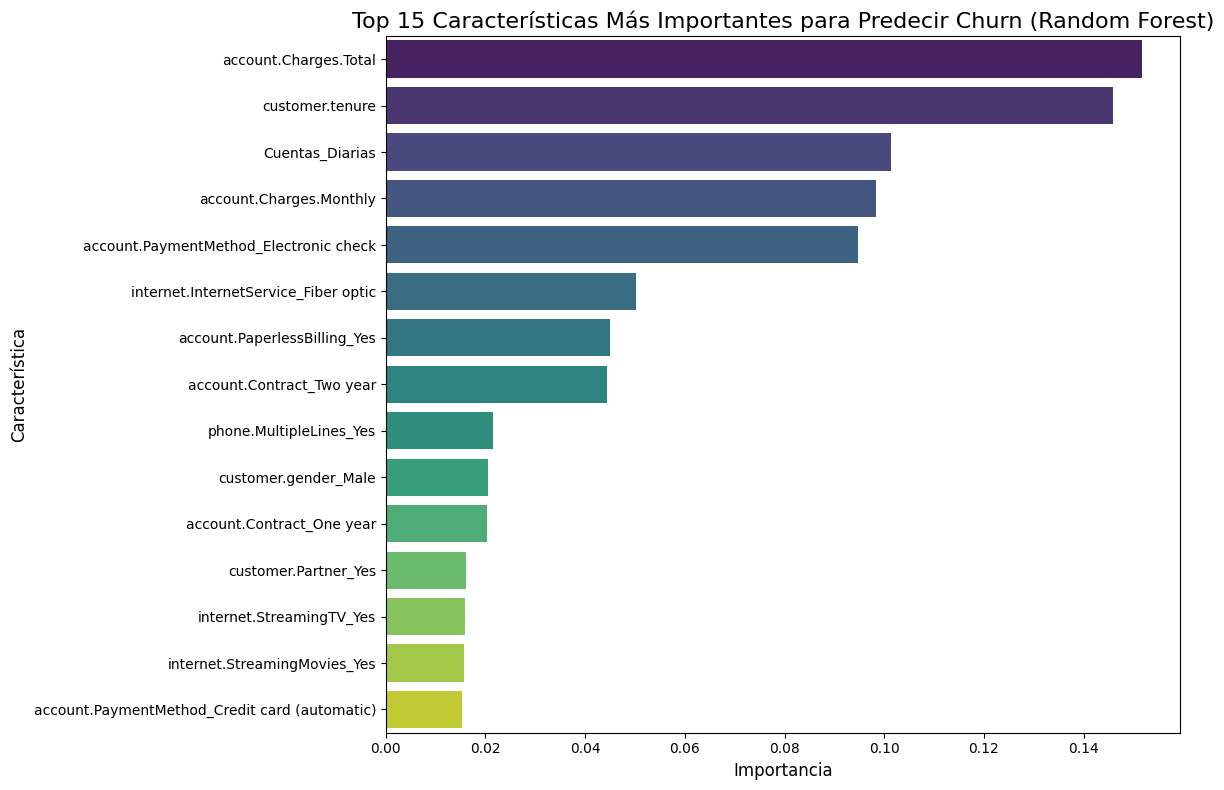

In [114]:
# @title 14. Analisis de Variable - Random Forest

# Asegurarse de que X y rf están disponibles
if 'X' not in globals() or 'rf' not in globals():
     print("Error: Las variables X o rf no encontradas. Por favor, ejecuta las celdas anteriores.")
else:
    # Obtener nombres de características del DataFrame original X
    feature_names = X.columns

    # Obtener importancias de características del modelo Random Forest entrenado (rf)
    feature_importances = rf.feature_importances_

    # Crear DataFrame
    importancia_df = pd.DataFrame({
        'Caracteristica': feature_names,
        'Importancia': feature_importances
    })

    # Ordenar por importancia
    importancia_df = importancia_df.sort_values(by='Importancia', ascending=False).reset_index(drop=True)

    print("\nTop 15 Características más importantes para predecir Churn (Random Forest):")
    display(importancia_df.head(15)) # Usar display para una mejor visualización

    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importancia', y='Caracteristica', data=importancia_df.head(15), palette='viridis')
    plt.title('Top 15 Características Más Importantes para Predecir Churn (Random Forest)', fontsize=16)
    plt.xlabel('Importancia', fontsize=12)
    plt.ylabel('Característica', fontsize=12)
    plt.tight_layout()
    plt.show()




Top 10 Características con mayor influencia (coeficientes) según Regresión Logística:


,Caracteristica,Coeficiente
0,account.Charges.Monthly,-4.530366
1,Cuentas_Diarias,-4.530366
2,internet.InternetService_Fiber optic,4.330215
3,phone.PhoneService_Yes,2.885806
4,customer.tenure,-2.038722
5,internet.StreamingTV_Yes,1.623981
6,internet.StreamingMovies_Yes,1.594804
7,phone.MultipleLines_No phone service,1.519407
8,account.Charges.Total,1.172368
9,phone.MultipleLines_Yes,0.973531


/tmp/ipython-input-1767309957.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coeficiente', y='Caracteristica', data=coeficientes_df.head(15), palette='coolwarm')


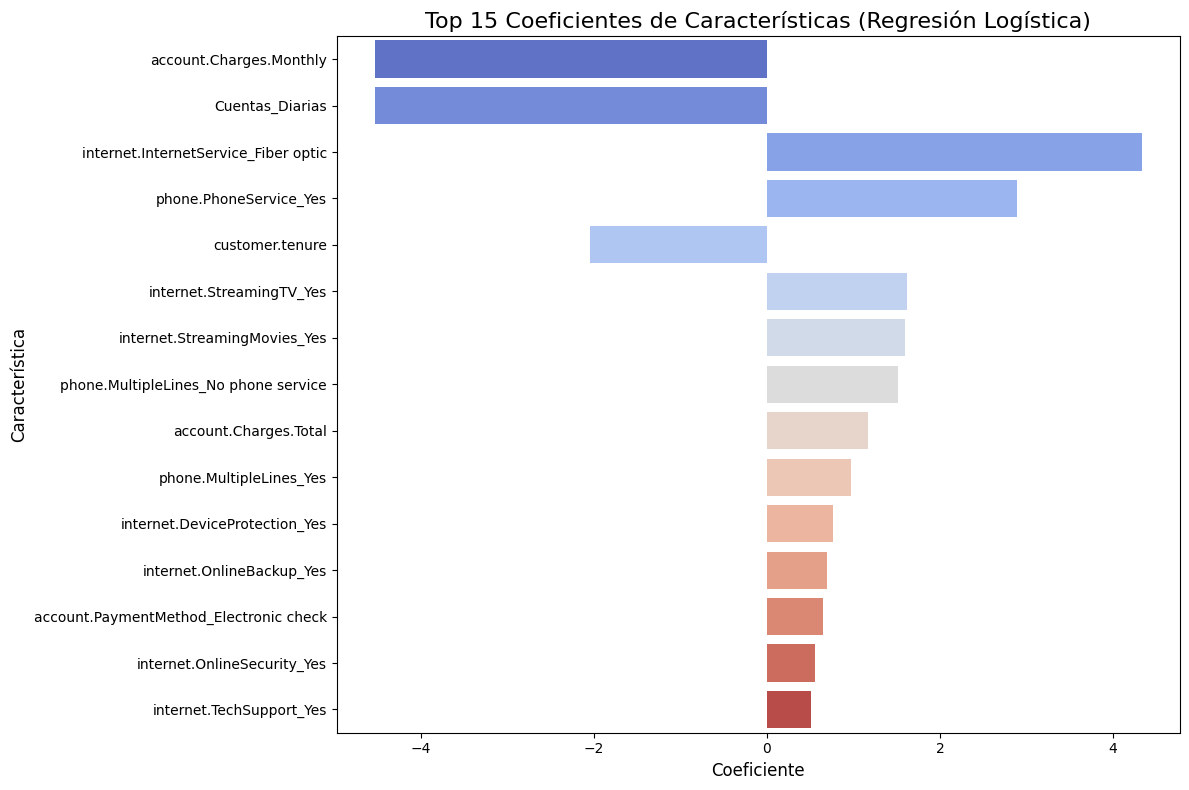

In [115]:
# @title 15. Analisis de Variables - Regresion Logistica
# 2. Coeficientes de Regresión Logística (para entender la dirección de la influencia)

# Asegurarse de que log_reg y X están disponibles
if 'log_reg' not in globals() or 'X' not in globals():
    print("Error: Las variables log_reg o X no encontradas. Por favor, ejecuta las celdas anteriores.")
else:
    # Obtener nombres de características del DataFrame original X
    feature_names = X.columns

    # Extraer coeficientes del modelo de Regresión Logística entrenado (log_reg)
    coeficientes = log_reg.coef_[0]

    # Crear DataFrame
    coeficientes_df = pd.DataFrame({
        'Caracteristica': feature_names,
        'Coeficiente': coeficientes
    })
    coeficientes_df['Abs_Coeficiente'] = coeficientes_df['Coeficiente'].abs()
    coeficientes_df = coeficientes_df.sort_values(by='Abs_Coeficiente', ascending=False).reset_index(drop=True)

    print("\nTop 10 Características con mayor influencia (coeficientes) según Regresión Logística:")
    display(coeficientes_df.drop('Abs_Coeficiente', axis=1).head(10)) # Usar display para una mejor visualización

    plt.figure(figsize=(12, 8))
    sns.barplot(x='Coeficiente', y='Caracteristica', data=coeficientes_df.head(15), palette='coolwarm')
    plt.title('Top 15 Coeficientes de Características (Regresión Logística)', fontsize=16)
    plt.xlabel('Coeficiente', fontsize=12)
    plt.ylabel('Característica', fontsize=12)
    plt.tight_layout()
    plt.show()

Importancia de Variables (Permutación) - Modelo KNN:


,Variable,Importancia_media,Desviación
0,phone.PhoneService_Yes,0.012633,0.002027
1,phone.MultipleLines_No phone service,0.009723,0.003330
2,internet.TechSupport_Yes,0.006955,0.004915
3,account.PaymentMethod_Credit card (automatic),0.003478,0.003425
4,account.Contract_One year,0.002058,0.001808
5,internet.DeviceProtection_Yes,0.000994,0.004929
6,internet.InternetService_Fiber optic,0.000994,0.003941
7,Cuentas_Diarias,0.000142,0.004256
8,account.Charges.Monthly,0.000142,0.004256
9,customer.Dependents_Yes,0.000071,0.004572


/tmp/ipython-input-873181046.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia_media', y='Variable', data=importancia_knn.head(15), palette='viridis')


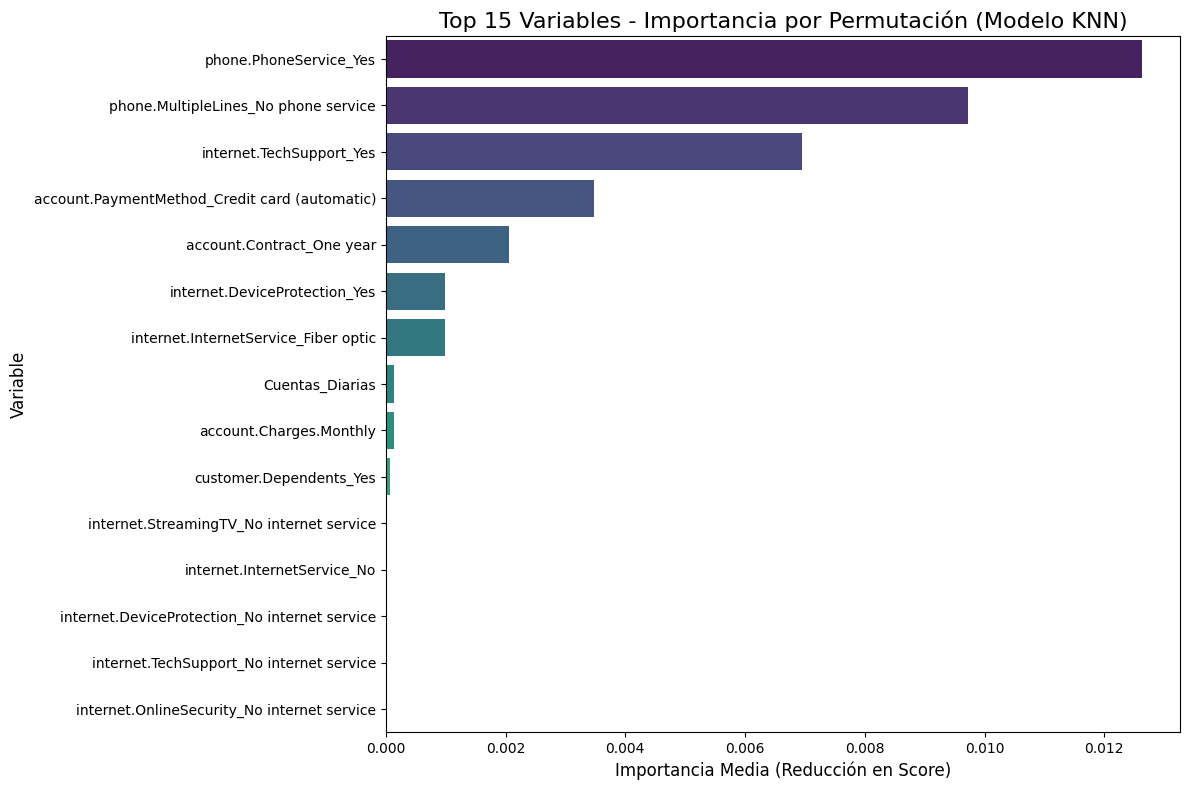

In [116]:
# @title 16. Analisis de Variables - Modelo KNM

from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarse de que el modelo KNN entrenado y los datos de prueba estandarizados están disponibles
if 'knn' not in globals() or 'X_test_scaled' not in globals() or 'y_test' not in globals():
    print("Error: El modelo KNN o los datos de prueba no encontrados. Por favor, ejecuta las celdas donde se entrena el modelo KNN (celda x8DtHBXvDeC7) y se estandarizan los datos (celda 965rcKQ23tnZ).")
else:
    # Calcular la importancia por permutación
    # Usamos el conjunto de prueba estandarizado para la evaluación
    results = permutation_importance(knn, X_test_scaled, y_test, n_repeats=10, random_state=42, n_jobs=-1)

    # Obtener los nombres de las características del DataFrame original X
    # Asegurarse de que X está disponible
    if 'X' not in globals():
        print("Error: El DataFrame X no encontrado. Por favor, ejecuta las celdas anteriores.")
    else:
        feature_names = X.columns

        # Crear DataFrame para los resultados
        importancia_knn = pd.DataFrame({
            'Variable': feature_names,
            'Importancia_media': results.importances_mean,
            'Desviación': results.importances_std
        })

        # Ordenar por importancia media
        importancia_knn = importancia_knn.sort_values(by='Importancia_media', ascending=False).reset_index(drop=True)

        print("Importancia de Variables (Permutación) - Modelo KNN:")
        display(importancia_knn.head(15)) # Mostrar las top 15


        # Graficar la importancia de las variables (opcional, puede ser útil para visualizar)
        plt.figure(figsize=(12, 8))
        sns.barplot(x='Importancia_media', y='Variable', data=importancia_knn.head(15), palette='viridis')
        plt.title('Top 15 Variables - Importancia por Permutación (Modelo KNN)', fontsize=16)
        plt.xlabel('Importancia Media (Reducción en Score)', fontsize=12)
        plt.ylabel('Variable', fontsize=12)
        plt.tight_layout()
        plt.show()

## Informe sobre los Factores que Influyen en la Cancelación de Clientes y Estrategias de Retención

Basado en el análisis exploratorio de datos, el análisis de correlación, la importancia de variables de los modelos de Random Forest y Regresión Logística, y la evaluación del rendimiento de los modelos (Regresión Logística, Random Forest y KNN), hemos identificado varios factores clave que influyen en la probabilidad de que un cliente cancele el servicio:

**Principales Factores que Afectan la Cancelación:**

1.  **Tipo de Contrato (`account.Contract`):** El análisis dirigido mostró claramente que los clientes con contratos mes a mes (`Month-to-month`) tienen una tasa de cancelación significativamente más alta en comparación con aquellos con contratos de uno o dos años. Esto sugiere que los clientes con compromisos a largo plazo son más propensos a permanecer.

2.  **Antigüedad del Cliente (`customer.tenure`):** La correlación con la variable Churn (`-0.352`) y la alta importancia en los modelos (Random Forest y Regresión Logística) indican que los clientes con mayor antigüedad son menos propensos a cancelar. Los clientes nuevos o con poca antigüedad presentan un mayor riesgo de churn.

3.  **Servicio de Internet (`internet.InternetService_Fiber optic`):** Tener el servicio de Internet de Fibra Óptica (`internet.InternetService_Fiber optic` con una correlación de `0.308`) está fuertemente relacionado con una mayor probabilidad de cancelación, según el análisis de correlación y los coeficientes de la Regresión Logística. Esto podría indicar problemas con la calidad del servicio de fibra o expectativas no cumplidas.

4.  **Método de Pago (`account.PaymentMethod_Electronic check`):** Los clientes que utilizan el pago electrónico (`account.PaymentMethod_Electronic check` con una correlación de `0.302`) también muestran una mayor propensión a cancelar. Esto podría estar asociado con la conveniencia del pago electrónico para cambiar de proveedor o con problemas específicos relacionados con este método de pago.

5.  **Cargos Mensuales (`account.Charges.Monthly`) y Cargos Totales (`account.Charges.Total`):** Aunque con una correlación moderada, los cargos mensuales más altos (`0.193`) están asociados con una mayor probabilidad de churn. Curiosamente, el gasto total (`-0.199`) tiene una correlación negativa, lo que puede estar relacionado con la antigüedad (clientes con más antigüedad acumulan mayores gastos totales y son menos propensos a cancelar). Los modelos también resaltan la importancia de estas variables.

6.  **Servicios Adicionales de Internet:** Variables como `internet.OnlineSecurity`, `internet.TechSupport`, `internet.DeviceProtection` y `internet.OnlineBackup` (y sus contrapartes 'No internet service') tienen una correlación negativa con el churn, y los coeficientes de la Regresión Logística también sugieren que tener estos servicios reduce la probabilidad de cancelación. Esto indica que los servicios de seguridad, soporte y protección de dispositivos contribuyen a la retención.

7.  **Facturación Sin Papel (`account.PaperlessBilling_Yes`):** Los clientes con facturación sin papel (`0.192`) muestran una correlación positiva con el churn. Esto podría sugerir que estos clientes son más "digitales" y, por lo tanto, más propensos a comparar y cambiar de proveedor en línea.

**Rendimiento de los Modelos:**

Al comparar los modelos (Regresión Logística, Random Forest y KNN), observamos que la Regresión Logística y Random Forest obtuvieron métricas de rendimiento ligeramente mejores en general, con accuracy alrededor del 77%. La matriz de confusión y el reporte de clasificación nos dan una idea más detallada de cómo se desempeñan en la identificación de clientes que realmente cancelan (Recall) y la precisión de sus predicciones de cancelación (Precision). Es importante considerar el contexto del negocio para decidir qué métrica optimizar (por ejemplo, minimizar falsos negativos - no predecir churn cuando sí ocurrirá - puede ser crucial para implementar estrategias de retención a tiempo).

**Estrategias de Retención Basadas en los Resultados:**

Basado en los factores identificados, se proponen las siguientes estrategias de retención:

*   **Clientes con Contratos Mes a Mes:**
    *   Ofrecer incentivos para cambiarse a contratos de mayor duración (descuentos, mejoras de servicio).
    *   Comunicación proactiva para entender las razones de la flexibilidad y abordar posibles preocupaciones.
    *   Programas de fidelización que recompensen la permanencia.

*   **Clientes Nuevos y de Poca Antigüedad:**
    *   Programas de "onboarding" robustos para asegurar una experiencia positiva inicial.
    *   Seguimiento cercano en los primeros meses para resolver dudas y problemas rápidamente.
    *   Ofrecer beneficios o soporte adicional en las primeras etapas.

*   **Clientes con Fibra Óptica y Pago Electrónico:**
    *   Investigar las razones detrás de la alta tasa de churn en estos segmentos. ¿Hay problemas técnicos con la fibra? ¿La experiencia de pago electrónico presenta inconvenientes?
    *   Mejorar la calidad y fiabilidad del servicio de fibra.
    *   Optimizar la experiencia del usuario con el método de pago electrónico.

*   **Clientes con Altos Cargos Mensuales:**
    *   Revisar las estructuras de precios y ofrecer opciones de planes más adecuados o descuentos por paquetes de servicios.
    *   Comunicar claramente el valor que reciben por sus pagos.

*   **Promover Servicios Adicionales:**
    *   Destacar los beneficios de los servicios de seguridad, soporte y protección de dispositivos, ya que contribuyen a la retención.
    *   Ofrecer pruebas gratuitas o descuentos para incentivar la adopción de estos servicios.

*   **Clientes con Facturación Sin Papel:**
    *   Aunque son convenientes, es importante entender si estos clientes tienen mayor facilidad para cambiar de proveedor.
    *   Mantener la comunicación de valor y ofrecer beneficios exclusivos para usuarios digitales.

**Conclusiones Adicionales:**

Es fundamental monitorear continuamente estos factores y el rendimiento del modelo. La implementación de estas estrategias debe ser seguida por un análisis de su impacto en la tasa de churn para ajustarlas según sea necesario. Un enfoque proactivo y basado en datos permitirá identificar a los clientes en riesgo y tomar medidas para retenerlos antes de que cancelen.